In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------------------------------------------------------------------

# Data Processing and Analysis

In [3]:
file_name =  "Dataset.xlsx"
sheet =  'Heart1'
df = pd.read_excel(io=file_name, sheet_name=sheet)
df=df.head(100)
df=df[['Sex', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope','HeartDisease']]
df

,Sex,ChestPainType,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,N,0.0,Up,0
1,F,NAP,N,1.0,Flat,1
2,M,ATA,N,0.0,Up,0
3,F,ASY,Y,1.5,Flat,1
4,M,NAP,N,0.0,Up,0
...,...,...,...,...,...,...
95,M,ASY,Y,2.0,Flat,1
96,M,ATA,N,0.0,Up,0
97,M,NAP,N,0.0,Up,0
98,M,ASY,N,0.0,Up,0


In [4]:
df['HeartDisease'].value_counts()

0    65
1    35
Name: HeartDisease, dtype: int64

In [5]:
df.isnull().any()

Sex               False
ChestPainType     False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [6]:
for i in df['Sex']:
    if i == 'M':
        df['Sex'] = df['Sex'].replace(['M'],0)
    elif i == 'F':
        df['Sex'] = df['Sex'].replace(['F'],1)
        
for i in df['ExerciseAngina']:
    if i == 'N':
        df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N'],0)
    elif i == 'Y':
        df['ExerciseAngina'] = df['ExerciseAngina'].replace(['Y'],1)
        
        
        
for i in df['ST_Slope']:
    if i == 'Up':
        df['ST_Slope'] = df['ST_Slope'].replace(['Up'],0)
    elif i == 'Flat':
        df['ST_Slope'] = df['ST_Slope'].replace(['Flat'],1)
        
        
for i in df['ChestPainType']:
    if i == 'ATA':
        df['ChestPainType'] = df['ChestPainType'].replace(['ATA'],0)
    elif i == 'ASY':
        df['ChestPainType'] = df['ChestPainType'].replace(['ASY'],1)
    elif i == 'NAP':
        df['ChestPainType'] = df['ChestPainType'].replace(['NAP'],2)
    elif i == 'TA':
        df['ChestPainType'] = df['ChestPainType'].replace(['TA'],3)

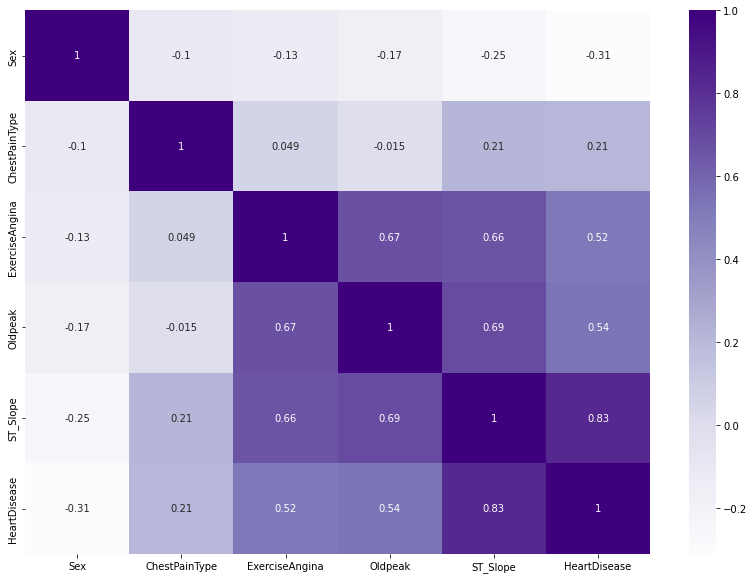

In [7]:
#Correlation Matrix
corr = df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="Purples",annot=True)
plt.show()

In [8]:
target = df['HeartDisease']
df = df.drop('HeartDisease', axis =1)

X = df; Y = target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)   

# -------------------------------------------------------------------------------------------------------

# 1. Logistic Regression

In [9]:
from sklearn import linear_model

model = linear_model.LogisticRegression(random_state = 0,solver = 'liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
print(model.score(X_train, y_train),'Train')
print(model.score(X_test, y_test),'Test')
print("Report : ",classification_report(y_test, y_pred))

0.9142857142857143 Train
0.9 Test
Report :                precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Accuracy Score: 90.00')

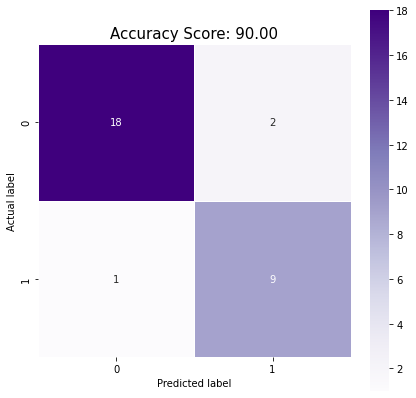

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Purples')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

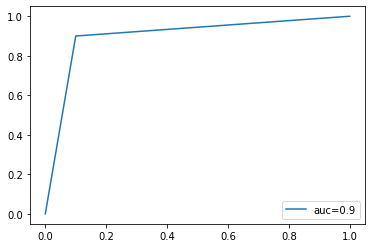

In [12]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

# -------------------------------------------------------------------------------------------------------

# 2. Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
print(model.score(X_train, y_train),'Train')
print(model.score(X_test, y_test),'Test')
print("Report : ",classification_report(y_test, y_pred))

0.9857142857142858 Train
0.9 Test
Report :                precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Accuracy Score: 90.00')

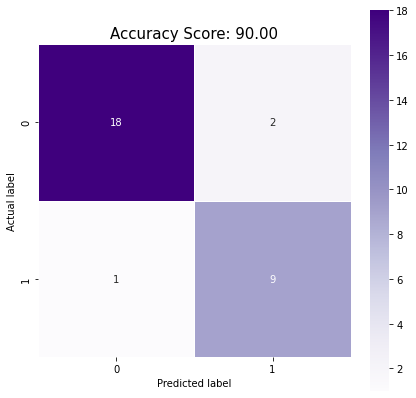

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Purples')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

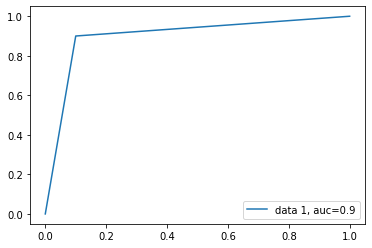

In [16]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# -------------------------------------------------------------------------------------------------------

# 3. K-Nearest Neighbors

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
  
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
for keys, values in scores.items():
    print(keys, ':', values)    

2 : [0.9714285714285714, 0.9]
3 : [0.9428571428571428, 0.9]
4 : [0.9285714285714286, 0.9]
5 : [0.9142857142857143, 0.9]
6 : [0.8857142857142857, 0.9]
7 : [0.9, 0.9]
8 : [0.9, 0.9]
9 : [0.8571428571428571, 0.9]
10 : [0.8428571428571429, 0.9]
11 : [0.8571428571428571, 0.9]
12 : [0.8428571428571429, 0.9]
13 : [0.8571428571428571, 0.9]
14 : [0.7714285714285715, 0.8333333333333334]
15 : [0.7714285714285715, 0.8666666666666667]
16 : [0.7857142857142857, 0.8333333333333334]
17 : [0.8, 0.8333333333333334]
18 : [0.8, 0.8333333333333334]
19 : [0.8, 0.8333333333333334]
20 : [0.8, 0.8666666666666667]


In [18]:
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print(model.score(X_train, y_train),'Train')
print(model.score(X_test, y_test),'Test')
print("Report : ",classification_report(y_test, y_pred))

0.9 Train
0.9 Test
Report :                precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Accuracy Score: 90.00')

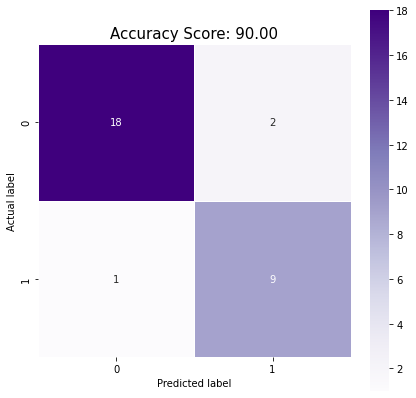

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Purples')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

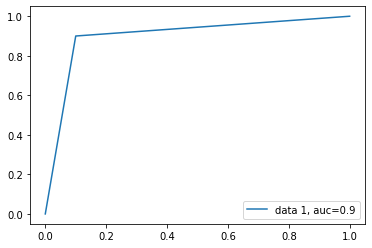

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# -------------------------------------------------------------------------------------------------------

# 4. Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
print(model.score(X_train, y_train),'Train')
print(model.score(X_test, y_test),'Test')
print("Report : ",classification_report(y_test, y_pred))

0.9 Train
0.9333333333333333 Test
Report :                precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30



Text(0.5, 1.0, 'Accuracy Score: 93.33')

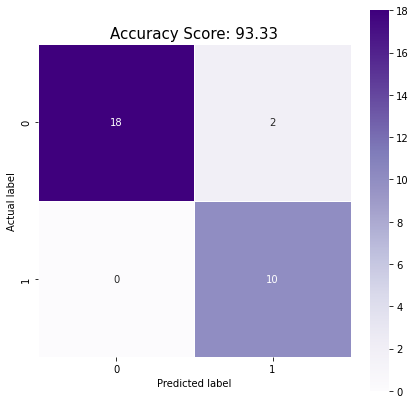

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Purples')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

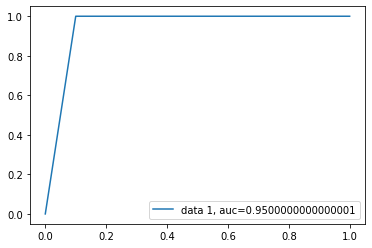

In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# -------------------------------------------------------------------------------------------------------

# 5. Support Vector Machine

In [26]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print(model.score(X_train, y_train),'Train')
print(model.score(X_test, y_test),'Test')
print("Report : ",classification_report(y_test, y_pred))

0.9285714285714286 Train
0.9333333333333333 Test
Report :                precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30



Text(0.5, 1.0, 'Accuracy Score: 93.33')

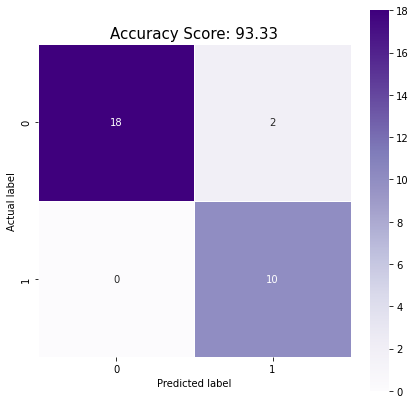

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Purples')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)

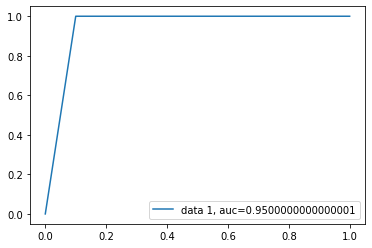

In [29]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# -------------------------------------------------------------------------------------------------------

# ALL OF THE MODELS ARE WORKING VERY NICELY WITH  ONLY 100 ROWS OF DATA

# NAIVE BAYES & SVM PERFORM THE BEST WITH SIMILAR RESULTS